In [24]:
import tensorflow as tf
import seaborn as sns
import pandas as pd

# Data preparation

In [25]:
car_df = pd.read_csv("train.csv")

In [26]:
car_df.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
5,6,650007,844846,6,148846,2,9,13,138,61,109,177933.5
6,7,633344,756063,5,78025,1,9,15,171,94,132,410877.0
7,8,662990,891569,6,76546,1,2,12,146,109,96,467471.5
8,9,543184,841354,7,57662,4,7,14,151,50,132,462397.5
9,10,573043,879481,2,132347,2,3,12,200,115,82,197266.0


In [27]:
car_df.shape

(1000, 12)

In [28]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


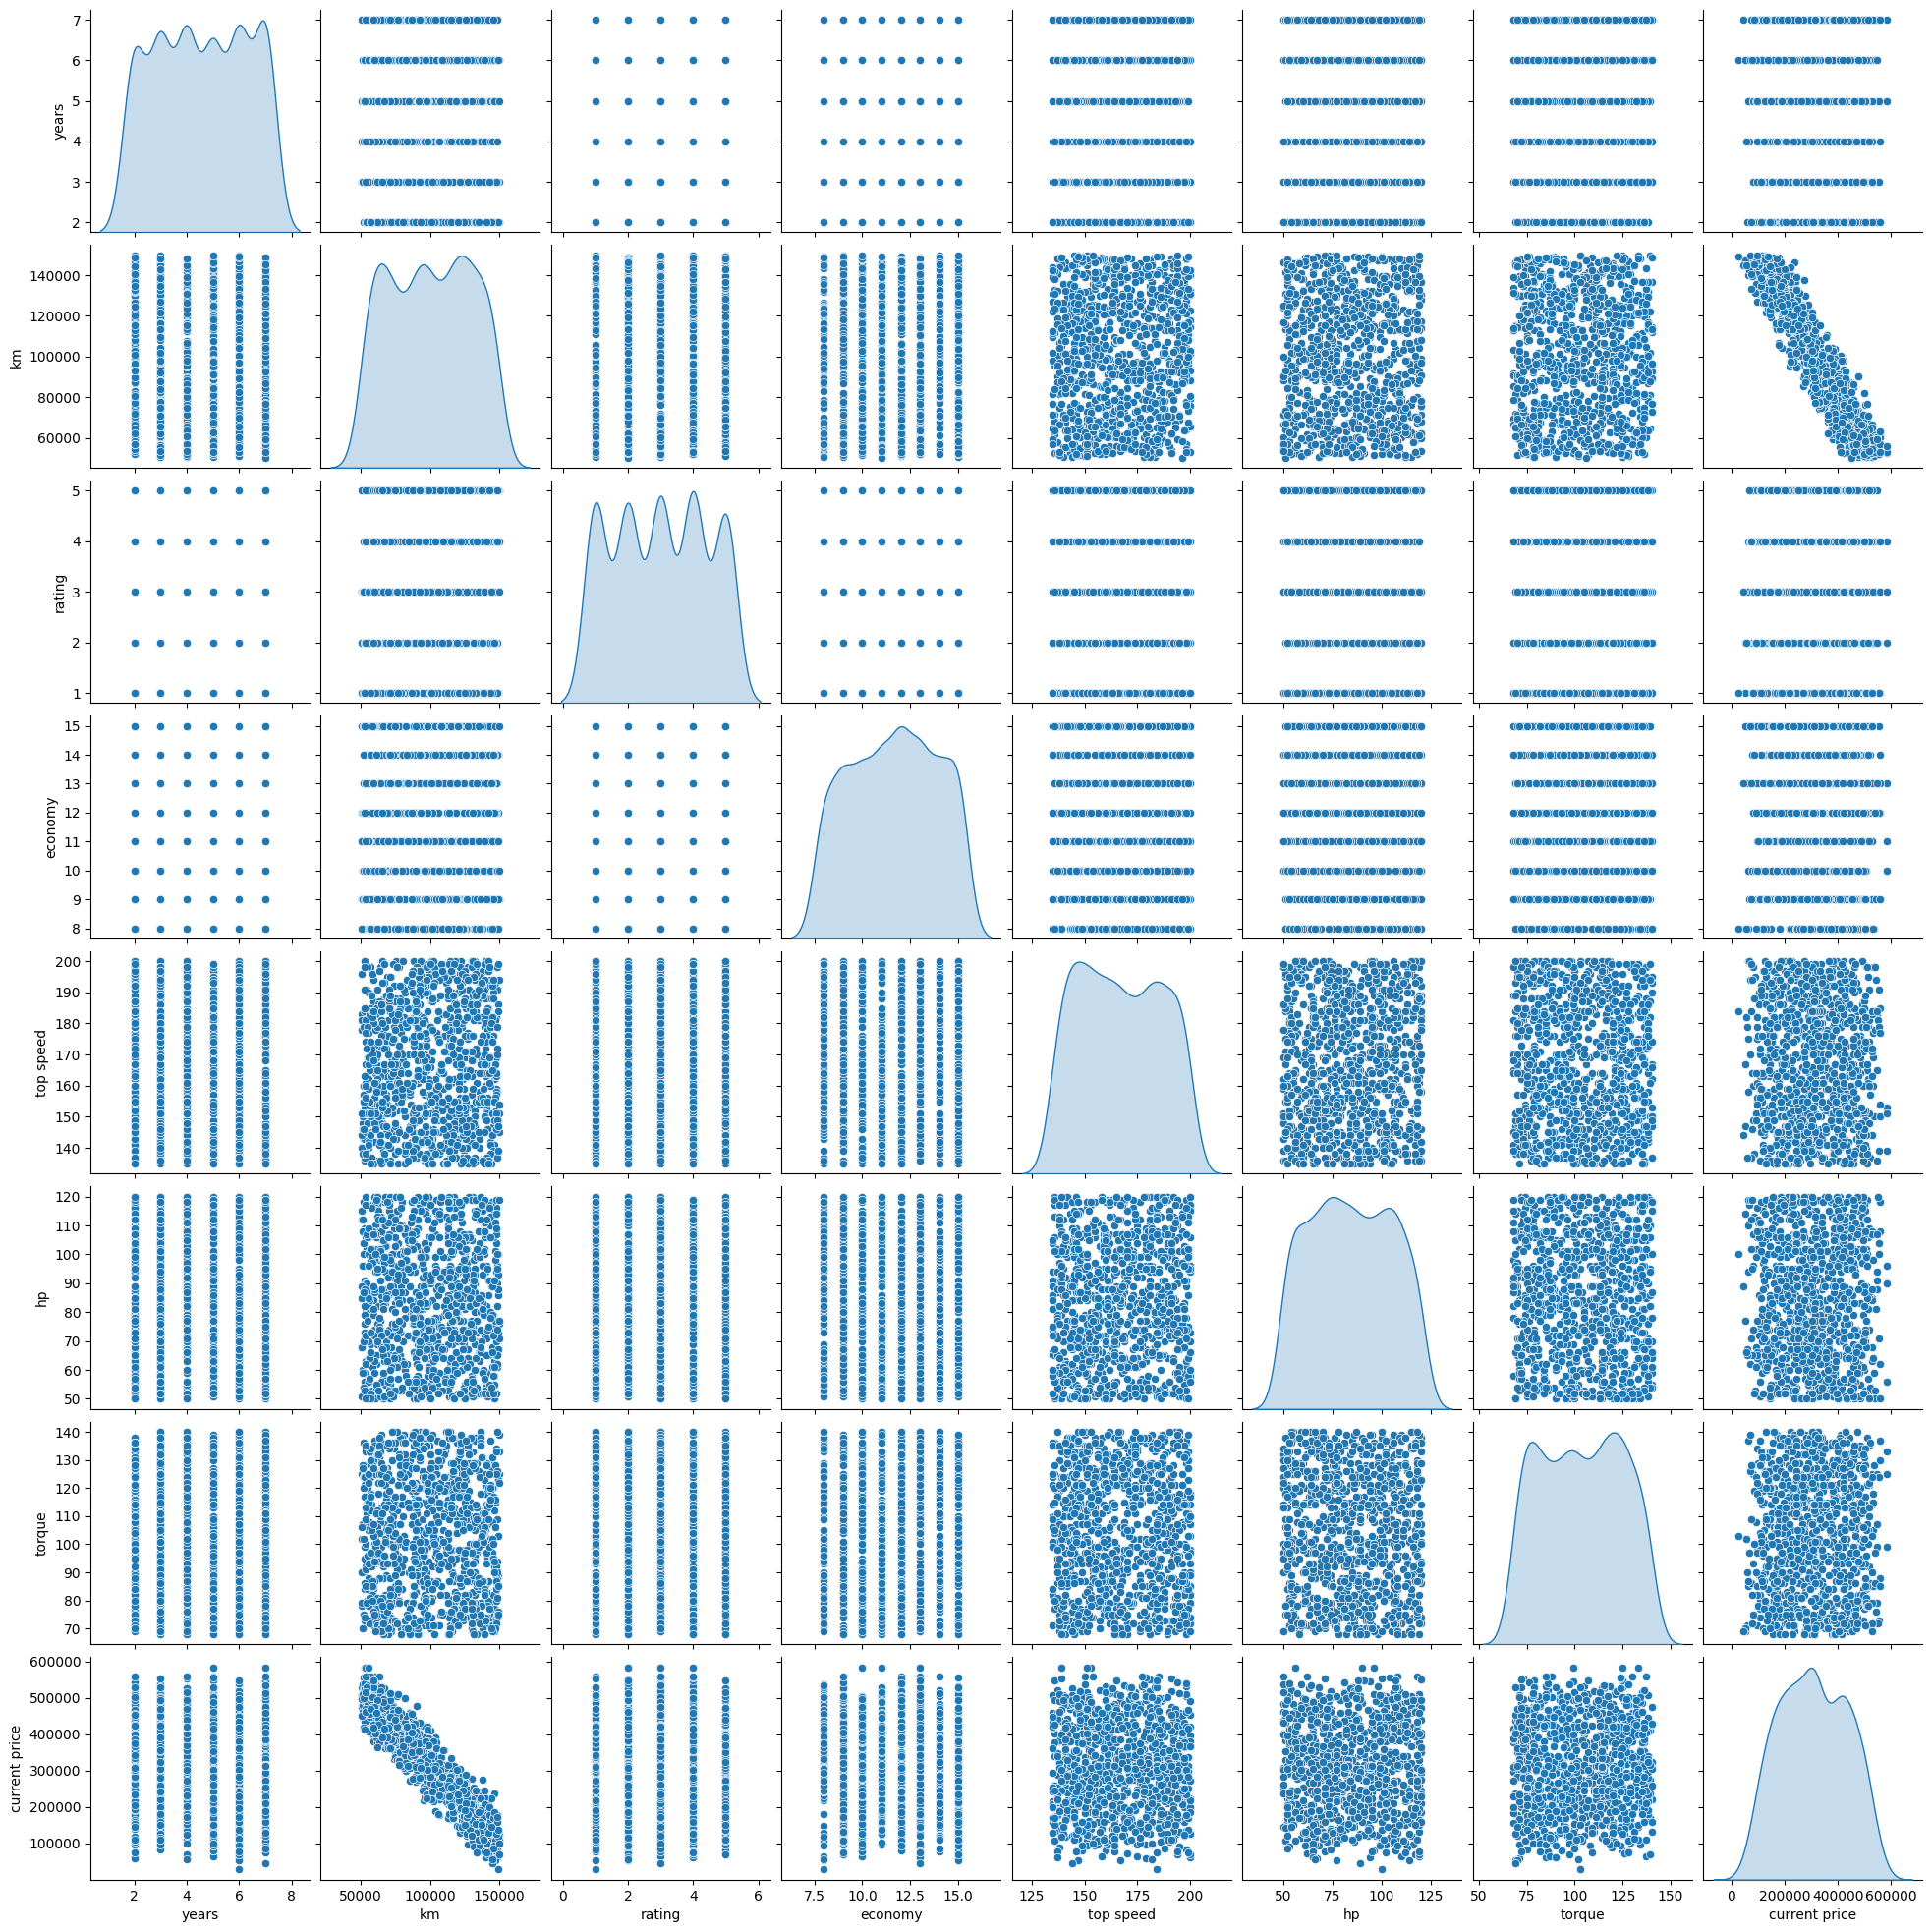

In [29]:
numeric_features = ['years', 'km', 'rating', 'economy', 'top speed', 'hp', 'torque', 'current price']
sns.pairplot(car_df[numeric_features], diag_kind='kde')

In [33]:
tensor_data = tf.constant(car_df)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float64, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, 2.000000e+00,
        1.325380e+05, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.810000e+02, 5.300000e+01, 9.700000e+01, 2.153860e+05],
       [4.000000e+00, 5.739990e+05, 7.223810e+05, 4.000000e+00,
        1.010650e+05, 4.000000e+00, 3.000000e+00, 1.100000e+01,
        1.970000e+02, 5.400000e+01, 1.160000e+02, 2.442955e+05],
       [5.000000e+00, 6.913880e+05, 8.113350e+05, 6.000000e+00,
        6.155900e+04, 3.000000e+00, 9.000000e+00, 1.200000e+01,
        1.600000e+02, 5.300000e+01, 1.050000e+02, 5

In [34]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float64, numpy=
array([[3.640000e+02, 6.098590e+05, 8.842270e+05, 2.000000e+00,
        5.357300e+04, 2.000000e+00, 8.000000e+00, 1.300000e+01,
        1.810000e+02, 1.200000e+02, 7.200000e+01, 5.494060e+05],
       [2.880000e+02, 6.442410e+05, 8.748050e+05, 7.000000e+00,
        6.309800e+04, 3.000000e+00, 2.000000e+00, 1.500000e+01,
        1.870000e+02, 9.800000e+01, 1.310000e+02, 4.991855e+05],
       [9.390000e+02, 6.487120e+05, 8.516130e+05, 7.000000e+00,
        5.323100e+04, 4.000000e+00, 9.000000e+00, 9.000000e+00,
        1.770000e+02, 6.200000e+01, 8.500000e+01, 5.590740e+05],
       [1.370000e+02, 5.458190e+05, 8.267380e+05, 7.000000e+00,
        1.240330e+05, 4.000000e+00, 1.000000e+01, 1.300000e+01,
        1.460000e+02, 1.070000e+02, 1.210000e+02, 2.325265e+05],
       [7.930000e+02, 5.494390e+05, 8.636840e+05, 4.000000e+00,
        5.221300e+04, 3.000000e+00, 5.000000e+00, 1.200000e+01,
        1.460000e+02, 8.700000e+01, 1.020000e+02, 4

In [38]:
X = tensor_data[:,3:-1]
print(X.shape)
X[:5]

(1000, 8)


<tf.Tensor: shape=(5, 8), dtype=float64, numpy=
array([[2.00000e+00, 5.35730e+04, 2.00000e+00, 8.00000e+00, 1.30000e+01,
        1.81000e+02, 1.20000e+02, 7.20000e+01],
       [7.00000e+00, 6.30980e+04, 3.00000e+00, 2.00000e+00, 1.50000e+01,
        1.87000e+02, 9.80000e+01, 1.31000e+02],
       [7.00000e+00, 5.32310e+04, 4.00000e+00, 9.00000e+00, 9.00000e+00,
        1.77000e+02, 6.20000e+01, 8.50000e+01],
       [7.00000e+00, 1.24033e+05, 4.00000e+00, 1.00000e+01, 1.30000e+01,
        1.46000e+02, 1.07000e+02, 1.21000e+02],
       [4.00000e+00, 5.22130e+04, 3.00000e+00, 5.00000e+00, 1.20000e+01,
        1.46000e+02, 8.70000e+01, 1.02000e+02]])>

In [42]:
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis=-1) #match shape with X instead of (5,) make it (5, 1)
print(y.shape)
y[:5]

(1000, 1)


<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[549406. ],
       [499185.5],
       [559074. ],
       [232526.5],
       [499121. ]])>